In [62]:
#Import libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.metrics import (
    r2_score,
    accuracy_score,
    f1_score,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
)
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(
    "ignore", category=DeprecationWarning
)  # to avoid deprecation warnings

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=[
        "#4B9AC7",
        "#4BE8E0",
        "#9DD4F3",
        "#97FBF6",
        "#2A7FAF",
        "#23B1AB",
        "#0E3449",
        "#015955",
    ]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg"  # to be replaced by "iframe" if working on JULIE

## Load du dataset et création du dataframe

In [63]:
# Import dataset
print("Loading dataset...")
dataset = pd.read_csv("/Users/agustindei/Documents/Jedha/Full_Stack/Projets/Walmart_Store_sales.csv")
print("...Done.")
print()

Loading dataset...
...Done.



# 1. EDA

In [64]:
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [65]:
dataset.info()
print("Dataframes's shape:", dataset.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB
Dataframes's shape: (150, 8)


In [66]:
dataset.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


In [67]:
#Checking missing values per column
print("Missing values: ")
print(dataset.isnull().any())
print()
print("Percentage of missing values: ")
display(100 * dataset.isnull().sum() / dataset.shape[0])

Missing values: 
Store           False
Date             True
Weekly_Sales     True
Holiday_Flag     True
Temperature      True
Fuel_Price       True
CPI              True
Unemployment     True
dtype: bool

Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

Most of the columns contain null values and the 

In [68]:
dataset['Store']

0       6.0
1      13.0
2      17.0
3      11.0
4       6.0
       ... 
145    14.0
146     7.0
147    17.0
148     8.0
149    19.0
Name: Store, Length: 150, dtype: float64

In [69]:
dataset = dataset.dropna(subset=['Weekly_Sales'])
dataset['Weekly_Sales'].isnull().any()

False

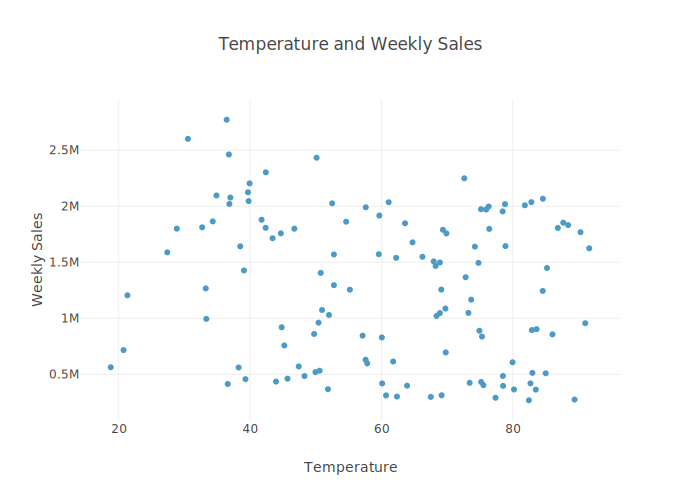

In [70]:

# Create a scatter plot for Temperature and Weekly Sales
fig = px.scatter(dataset, 
                 x='Temperature', 
                 y='Weekly_Sales', 
                 title='Temperature and Weekly Sales',
                 labels={'Weekly_Sales': 'Weekly Sales', 'Temperature': 'Temperature'})  # Display store number on hover

fig.show()


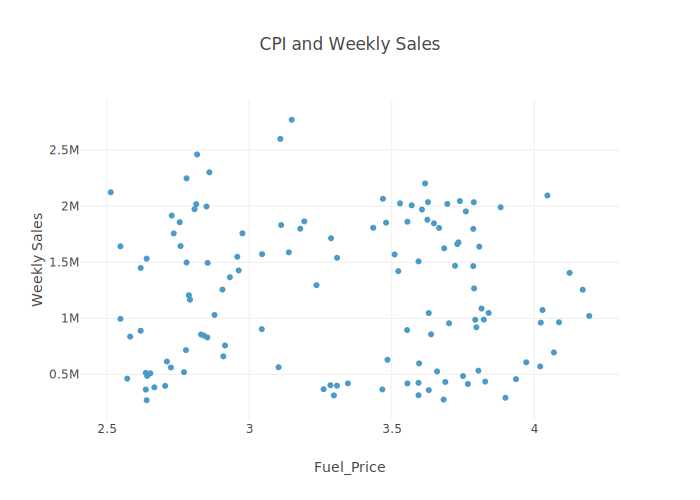

In [71]:
# scatter plot  Fuel price and Weekly Sales
fig = px.scatter(dataset, x='Fuel_Price', y='Weekly_Sales', title='CPI and Weekly Sales',
                 labels={'Fuel_Price':'Fuel_Price', 'Weekly_Sales':'Weekly Sales'})

# Show the plot
fig.show()

In [72]:
# Filter the dataset for fuel prices less than 3
total_sales = dataset.shape[0]

total_sales = dataset.shape[0]

filtered_sales = dataset[dataset['Fuel_Price'] < 3]

# Count the number of sales
sales_count = filtered_sales.shape[0]

percentage_sales_fuel_less_3 = (sales_count / total_sales) * 100


print(f"Number of sales with fuel price less than 3: {sales_count}")
print(f"Percentage of total sales: {percentage_sales_fuel_less_3:.2f}%")


Number of sales with fuel price less than 3: 44
Percentage of total sales: 32.35%


In [73]:
# Filter the dataset for fuel prices less than 

total_sales = dataset.shape[0]

filtered_sales = dataset[dataset['Fuel_Price'] >= 3]

# Count the number of sales
sales_count = filtered_sales.shape[0]

# Calculate the percentage of sales in this category
percentage_sales_fuel_over_3 = (sales_count / total_sales) * 100

print(f"Number of sales with fuel price greater than or equal to 3: {sales_count}")
print(f"Percentage of total sales: {percentage_sales_fuel_over_3:.2f}%")

Number of sales with fuel price greater than or equal to 3: 80
Percentage of total sales: 58.82%


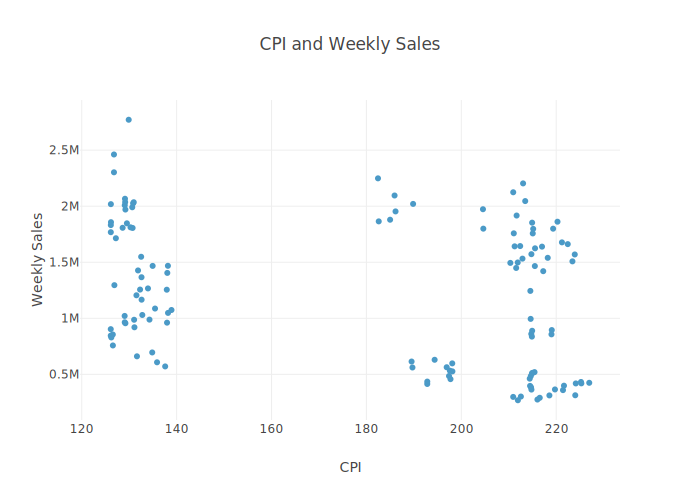

In [74]:

# scatter plot  Fuel price and Weekly Sales
fig = px.scatter(dataset, x='CPI', y='Weekly_Sales', title='CPI and Weekly Sales',
                 labels={'CPI':'CPI', 'Weekly_Sales':'Weekly Sales'})

# Show the plot
fig.show()


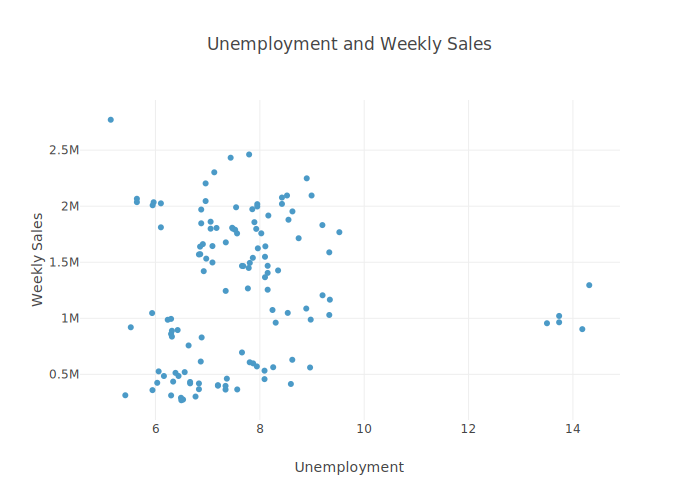

In [75]:
# scatter plot Unemployment price and Weekly Sales
fig = px.scatter(dataset, x='Unemployment', y='Weekly_Sales', title='Unemployment and Weekly Sales',
                 labels={'Unemployment':'Unemployment', 'Weekly_Sales':'Weekly Sales'})

# Show the plot
fig.show()

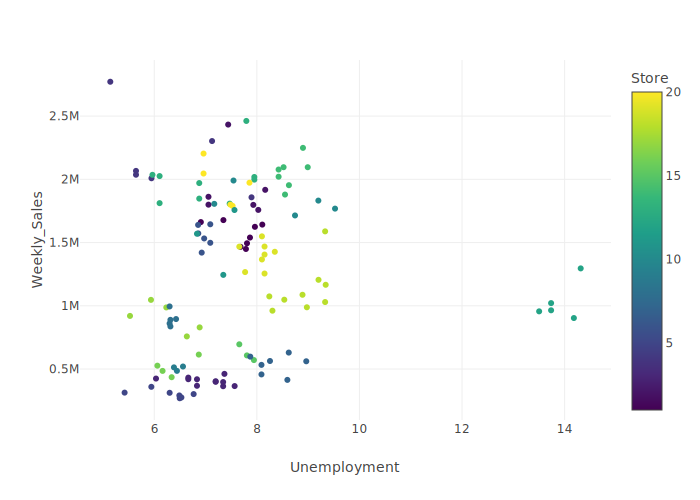

In [76]:
fig = px.scatter(dataset, x = 'Unemployment', y = 'Weekly_Sales', color = 'Store', labels = {'color': 'Weekly_Sales'})
fig.show()

Temperature and Weekly Sales:

- Most of Wallmart's sales concentrate between 40° and 80° (fahrenheit), which means between 4° and 26° (celsius).
- Less sales are registered below 40° and 30° (fahrenheit), which means 4° and -1° (celsius).

Fuel price and Weekly sales:

The Maximum fuel price in this dataset is 4.19.

We can see that in most of the cases in this dataset, the weekly sales are not higher when the fuel prices is lower than 3. 
This can be explained because:
    - As the .describe() function shows only 25% of dataset correspond to a fuel price equal to or less 2.8 or less.
    - As it was showed above, 58.82% of the sales in the dataset corresponds to sales that happened when fuel prices was equal or higher than 4.


Unemployment and Weekly Sales:

- Low unemployment rates (>6%)doesn't necessarily imply that the weekly sales in WallMart will be higher. 
- A big part of Wallmart's weekly sales in this dataset corresponds to zones with an unemployment rate between 6% and 9%,

### On crée les variables "day", "month", "year" and "day of the week" from the column "Date" which gathered all this info

In [77]:
dataset['Date'] = pd.to_datetime(dataset['Date'], dayfirst=True)


In [78]:
dataset["Day"] = dataset['Date'].map(lambda x: x.day)
dataset["Month"] = dataset['Date'].map(lambda x: x.month)
dataset["Year"] = dataset['Date'].map(lambda x: x.year)
dataset["DayOfWeek"] = dataset['Date'].map(lambda x: x.dayofweek)

In [79]:
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,DayOfWeek
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,18.0,2.0,2011.0,4.0
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,25.0,3.0,2011.0,4.0
3,11.0,NaT,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,28.0,5.0,2010.0,4.0
5,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,28.0,5.0,2010.0,4.0


In [80]:
dataset[['Weekly_Sales', 'Year']].groupby('Year').sum()

,Weekly_Sales
Year,
2010.0,64377268.83
2011.0,48389509.09
2012.0,35591216.59


Visualizations

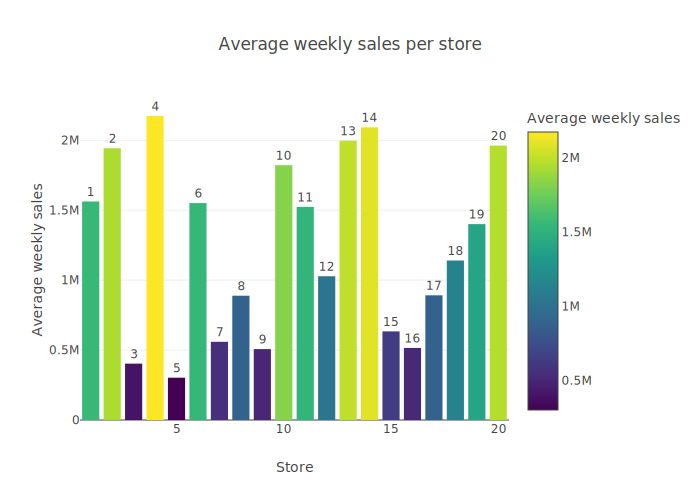

In [81]:
import pandas as pd
import plotly.express as px

# Group by Store and calculate the mean of Weekly Sales
store_sales_avg = dataset.groupby('Store')['Weekly_Sales'].mean().reset_index()

# Create a bar plot
fig = px.bar(store_sales_avg, x='Store', y='Weekly_Sales', 
             title='Average weekly sales per store',
             labels={'Weekly_Sales': 'Average weekly sales', 'Store': 'Store'},
             text= 'Store',
             color='Weekly_Sales')

fig.update_traces(textposition='outside')


fig.show()

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



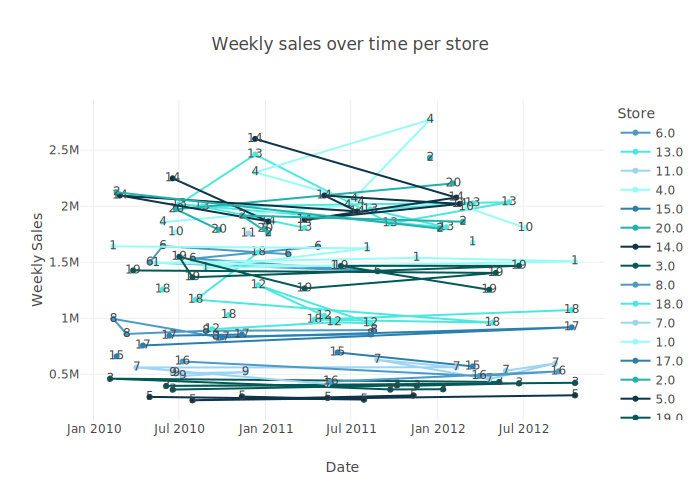

In [82]:
#Create a line plot
fig = px.line(dataset, x='Date', y='Weekly_Sales', color='Store', 
              title='Weekly sales over time per store',
              labels={'Weekly_Sales': 'Weekly Sales', 'Date': 'Date'},
            text='Store') 

fig.show()

The EDA shows that sales vary considerably depending on the store, therefore the 'store' variable may be very relevant for the model prediction.

The last graph 'Weekly sales over time per store' shows that the importance of the sales per store doesn't vary much over time in the dataset with the exception of the store number 4, 13 and 14.

# 2.Preprocessing

We drop null values in the targer. 

In [83]:
dataset = dataset.dropna(subset=['Weekly_Sales'])
dataset['Weekly_Sales'].isnull().any()

False

Outliers: 

We deal with the outliers we can see thanks to the describe() method by keeping the data within a standard deviation of +/-3 in a new df named filtered_df.

In [84]:
standard_deviations = 3
dataset[dataset.apply(lambda x: abs(x - x.mean()) / x.std() < standard_deviations)].any()

/var/folders/sp/y1prs_xd6c5dq9mttys340t40000gn/T/ipykernel_64216/3972092728.py:2: FutureWarning:

'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.



Store            True
Date             True
Weekly_Sales     True
Holiday_Flag    False
Temperature      True
Fuel_Price       True
CPI              True
Unemployment     True
Day              True
Month            True
Year             True
DayOfWeek       False
dtype: bool

In [85]:
outliers_cols = ['Temperature','Fuel_Price', 'CPI','Unemployment']
standard_deviation = 3
for i in outliers_cols:
    mean = dataset[i].mean(skipna=True)
    std = dataset[i].std(skipna=True)
    filtered_df = dataset[dataset[i].apply(lambda x: abs(x - mean) / std < standard_deviation)]

In [86]:
outliers_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
standard_deviation = 3

# Start with the entire dataset
filtered_df = dataset.copy()

for col in outliers_cols:
    mean = filtered_df[col].mean(skipna=True)
    std = filtered_df[col].std(skipna=True)
    # Filter based on standard deviation threshold
    filtered_df = filtered_df[(abs(filtered_df[col] - mean) / std) < standard_deviation]


In [87]:
filtered_df.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,DayOfWeek
count,90.000000,80,9.000000e+01,80.000000,90.00000,90.000000,90.000000,90.000000,80.000000,80.000000,80.000000,80.0
mean,9.900000,2011-05-17 11:06:00,1.233865e+06,0.075000,61.06100,3.318444,179.524905,7.389733,16.125000,6.362500,2010.887500,4.0
min,1.000000,2010-02-05 00:00:00,2.689290e+05,0.000000,18.79000,2.548000,126.128355,5.143000,1.000000,1.000000,2010.000000,4.0
25%,4.000000,2010-08-04 06:00:00,5.617240e+05,0.000000,45.34250,2.814750,132.602339,6.642250,10.000000,4.000000,2010.000000,4.0
50%,9.000000,2011-05-16 12:00:00,1.260826e+06,0.000000,61.45000,3.468000,197.166416,7.419000,16.500000,6.000000,2011.000000,4.0
75%,15.750000,2012-02-18 18:00:00,1.807159e+06,0.000000,75.79250,3.737750,214.855374,8.099000,23.250000,8.250000,2012.000000,4.0
max,20.000000,2012-10-19 00:00:00,2.771397e+06,1.000000,91.65000,4.170000,226.968844,9.342000,31.000000,12.000000,2012.000000,4.0
std,6.204475,NaN,6.647250e+05,0.265053,17.74604,0.484399,39.554303,0.982729,8.521566,3.028321,0.826672,0.0


In [88]:
filtered_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,DayOfWeek
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,18.0,2.0,2011.0,4.0
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,25.0,3.0,2011.0,4.0
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,28.0,5.0,2010.0,4.0
6,15.0,2011-06-03,695396.19,0.0,69.80,4.069,134.855161,7.658,3.0,6.0,2011.0,4.0
7,20.0,2012-02-03,2203523.20,0.0,39.93,3.617,213.023622,6.961,3.0,2.0,2012.0,4.0


# 3. Baseline model :  linear regression

### Since the model has to predict the weekly sales and the dayly sales, it may not be necessary to keep information about the day of the week but only about the month and the year.

### We will test a model keeping 'day' and 'DayOfWeek' variables and later another model without them.


In [89]:
# We separate target variable Y from features X
# We don't keep the columns 'date', 'DayOfWeek','Day' in X

print("Separating labels from features...")
target_variable = "Weekly_Sales"

X = filtered_df.drop([target_variable, 'Date', 'Day'], axis = 1)
Y = filtered_df.loc[:, target_variable]

print("...Done.")
print()

print("Y : ")
print(Y.head())
print()
print("X :")
print(X.head())

Separating labels from features...
...Done.

Y : 
0    1572117.54
1    1807545.43
4    1644470.66
6     695396.19
7    2203523.20
Name: Weekly_Sales, dtype: float64

X :
   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0    6.0           NaN        59.61       3.045  214.777523         6.858   
1   13.0           0.0        42.38       3.435  128.616064         7.470   
4    6.0           0.0        78.89       2.759  212.412888         7.092   
6   15.0           0.0        69.80       4.069  134.855161         7.658   
7   20.0           0.0        39.93       3.617  213.023622         6.961   

   Month    Year  DayOfWeek  
0    2.0  2011.0        4.0  
1    3.0  2011.0        4.0  
4    5.0  2010.0        4.0  
6    6.0  2011.0        4.0  
7    2.0  2012.0        4.0  


X.columns

In [90]:
# Divide dataset Train set & Test set
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [91]:
#We define the categorical and numerical features
categorical_features = ['Store', "Holiday_Flag"] # Names of categorical columns in X_train/X_test
numeric_features = [col for col in X.columns if col not in categorical_features]

In [92]:
# We check
numeric_features

['Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'Month',
 'Year',
 'DayOfWeek']

Pipeline

In [93]:
# pipeline for numeric features
# we replace missing values with SimpleImputer

numeric_transformer = Pipeline(
    steps=[
        (
        "imputer",
        SimpleImputer(strategy="mean"),
        ),  
        ("scaler", StandardScaler()),
    ]
)

# pipeline for categorical features
# we replace missing values with SimpleImputer and encode categorical values with OneHotEncoder

categorical_transformer = Pipeline(
   steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),  # missing values will be replaced by most frequent value
        ("encoder",OneHotEncoder()) 
    ]
)



In [94]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [95]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print("...Done.")
print(
    X_train[0:5]
) 
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head())
X_test = preprocessor.transform(
    X_test
)  
print("...Done.")
print(
    X_test[0:5, :]
) 
print()



Performing preprocessings on train set...
     Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
127   16.0           0.0        61.79       2.711  189.523128         6.868   
63     5.0           0.0        69.17       3.594  224.019287         5.422   
35    19.0           0.0        33.26       3.789  133.958742         7.771   
10     8.0           0.0        82.92       3.554  219.070197         6.425   
95     1.0           0.0        74.78       2.854  210.337426         7.808   

     Month    Year  DayOfWeek  
127    7.0  2010.0        4.0  
63    10.0  2012.0        4.0  
35     3.0  2011.0        4.0  
10     8.0  2011.0        4.0  
95     5.0  2010.0        4.0  
...Done.
[[ 0.04260362 -1.26840641  0.20507788 -0.55534542  0.16826221 -1.15712571
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          1.          0.          0.
   0.     

In [96]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [97]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")


Predictions on training set...
...Done.


In [98]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")

Predictions on test set...
...Done.


### Evaluating the model

In [99]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9823300272193435
R2 score on test set :  0.938595858298448


#### Overfitting test

In [100]:

print("Calcule de l'incertitude")
print("5-fold cross-validation...")

scores = cross_val_score(regressor, X_train, Y_train, cv=5)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

Calcule de l'incertitude
5-fold cross-validation...
The cross-validated R2-score is :  0.945087005549795
The standard deviation is :  0.026462943194536615


### By checking the cross-validated r2 score through r2 we notice that the baseline model is performing really bad.

## Feature selection : Let's try by reducing the number of variables and dropping 'day' and 'dayofweek' that, as explained before, doesn't seem important for predicting weekly sales instead of daily sales.

In [101]:
# We separate target variable Y from features X
# We don't keep the columns 'date', 'DayOfWeek','Day' in X

print("Separating labels from features...")
target_variable = "Weekly_Sales"

X = filtered_df.drop([target_variable,'Date','Day','DayOfWeek'], axis = 1)
Y = filtered_df.loc[:, target_variable]

print("...Done.")
print()

print("Y : ")
print(Y.head())
print()
print("X :")
print(X.head())

Separating labels from features...
...Done.

Y : 
0    1572117.54
1    1807545.43
4    1644470.66
6     695396.19
7    2203523.20
Name: Weekly_Sales, dtype: float64

X :
   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0    6.0           NaN        59.61       3.045  214.777523         6.858   
1   13.0           0.0        42.38       3.435  128.616064         7.470   
4    6.0           0.0        78.89       2.759  212.412888         7.092   
6   15.0           0.0        69.80       4.069  134.855161         7.658   
7   20.0           0.0        39.93       3.617  213.023622         6.961   

   Month    Year  
0    2.0  2011.0  
1    3.0  2011.0  
4    5.0  2010.0  
6    6.0  2011.0  
7    2.0  2012.0  


In [102]:
# Divide dataset Train set & Test set
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [103]:
#We define the categorical and numerical features
categorical_features = ['Store', "Holiday_Flag"] # Names of categorical columns in X_train/X_test
numeric_features = [col for col in X.columns if col not in categorical_features]

In [104]:
numeric_features

['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Year']

In [105]:
# pipeline for numeric features
# we replace missing values with SimpleImputer

numeric_transformer = Pipeline(
    steps=[
        (
        "imputer",
        SimpleImputer(strategy="mean"),
        ),  
        ("scaler", StandardScaler()),
    ]
)
categorical_transformer = Pipeline(
   steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),  # missing values will be replaced by most frequent value
        ("encoder",OneHotEncoder()) 
    ]
)

In [106]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [107]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print("...Done.")
print(
    X_train[0:5]
) 
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head())
X_test = preprocessor.transform(
    X_test
)  
print("...Done.")
print(
    X_test[0:5, :]
) 
print()


Performing preprocessings on train set...
     Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
127   16.0           0.0        61.79       2.711  189.523128         6.868   
63     5.0           0.0        69.17       3.594  224.019287         5.422   
35    19.0           0.0        33.26       3.789  133.958742         7.771   
10     8.0           0.0        82.92       3.554  219.070197         6.425   
95     1.0           0.0        74.78       2.854  210.337426         7.808   

     Month    Year  
127    7.0  2010.0  
63    10.0  2012.0  
35     3.0  2011.0  
10     8.0  2011.0  
95     5.0  2010.0  
...Done.
  (0, 0)	0.042603619566292404
  (0, 1)	-1.2684064129831014
  (0, 2)	0.20507787897090277
  (0, 3)	-0.5553454246885406
  (0, 4)	0.16826220729362615
  (0, 5)	-1.1571257121371719
  (0, 20)	1.0
  (0, 25)	1.0
  (1, 0)	0.45927689938857913
  (1, 1)	0.5805882929947872
  (1, 2)	1.092603852656994
  (1, 3)	-2.1273444147693765
  (1, 4)	1.1941188904708953
  (1

In [108]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [109]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9823300272193435
R2 score on test set :  0.938595858298448


### We test the overtfitting through cross-validation

In [110]:
#Overfitting test
print("Calcule de l'incertitude")
print("5-fold cross-validation...")

scores = cross_val_score(regressor, X_train, Y_train, cv=5)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

Calcule de l'incertitude
5-fold cross-validation...
The cross-validated R2-score is :  0.9450869691592274
The standard deviation is :  0.026462814160934836


## As the results show, we shouldn't keep the column 'date' (already decomposed in the columns 'year','month,'day' and 'DayOfWeek'), neither the columns 'DayOfWeek','Day'. This variables are creating noise and are not pertinent for predicting the weekly sales.

### We check features importance of the last model training

In [111]:
column_names = []

for name, pipeline, features_list in preprocessor.transformers_: # loop over pipelines
    if name == 'num': # if pipeline is for numeric variables
        features = numeric_features # just get the names of columns to which it has been applied
    else: # if pipeline is for categorical variables
        features = pipeline.named_steps['encoder'].get_feature_names_out(input_features= ['Store','Holiday_Flag']) # get output columns names from OneHotEncoder
    column_names.extend(features) # concatenate features names
print("Names of columns corresponding to each coefficient: ", column_names)


Names of columns corresponding to each coefficient:  ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Year', 'Store_1.0', 'Store_2.0', 'Store_3.0', 'Store_4.0', 'Store_5.0', 'Store_6.0', 'Store_7.0', 'Store_8.0', 'Store_9.0', 'Store_10.0', 'Store_11.0', 'Store_13.0', 'Store_14.0', 'Store_15.0', 'Store_16.0', 'Store_17.0', 'Store_18.0', 'Store_19.0', 'Store_20.0', 'Holiday_Flag_0.0', 'Holiday_Flag_1.0']


In [112]:
numeric_column_names = []
categorical_column_names = []

for name, pipeline, features_list in preprocessor.transformers_:
    if name == 'num':
        numeric_column_names.extend(features_list)
    else:
        categorical_column_names.extend(pipeline.named_steps['encoder'].get_feature_names_out(input_features=categorical_features))

print("Numeric column names:", numeric_column_names)
print("Categorical column names:", categorical_column_names)

Numeric column names: ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Year']
Categorical column names: ['Store_1.0', 'Store_2.0', 'Store_3.0', 'Store_4.0', 'Store_5.0', 'Store_6.0', 'Store_7.0', 'Store_8.0', 'Store_9.0', 'Store_10.0', 'Store_11.0', 'Store_13.0', 'Store_14.0', 'Store_15.0', 'Store_16.0', 'Store_17.0', 'Store_18.0', 'Store_19.0', 'Store_20.0', 'Holiday_Flag_0.0', 'Holiday_Flag_1.0']


In [113]:
coefs = pd.DataFrame(index = column_names, data = abs(regressor.coef_.transpose()), columns=["coefficients"])
coefs

,coefficients
Temperature,2.846734e+03
Fuel_Price,7.766583e+04
CPI,7.376683e+05
Unemployment,4.683026e+04
Month,1.323931e+04
Year,1.664630e+04
Store_1.0,3.768822e+05
Store_2.0,9.525897e+04
Store_3.0,1.603926e+06
Store_4.0,1.928047e+06


## Baseline model conclusions:

The cross validated r2 score of 0.945 shows that the baseline model is performing well with the above pre-processing. If we had kept the variables "day" and "day of the week", the score would haven't been satisfactory. This proves that these variables were creating noise.

Indeed, if the model has to predict the weekly sales, it is not necessary to keep information about the day of the week but only about the month and the year.

In any case the 'month' and 'year' features are not the most relevant features. The most relevant features are 'Holiday Flag', 'Fuel Price', 'CPI', and 'Unemployment' in this order.

## Regularization

### Since there are some feature less important as others as the above table shows let's apply regularization techniques Ridge and Lasso

### Ridge

In [114]:
ridge = Ridge()
ridge.fit(X_train, Y_train)
print("R2 score on training set : ", ridge.score(X_train, Y_train))
print("R2 score on test set : ", ridge.score(X_test, Y_test))

R2 score on training set :  0.9403295117868047
R2 score on test set :  0.8407478931725766


In [115]:
print("5-fold cross-validation...")

scores = cross_val_score(ridge, X_train, Y_train, cv=5)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

5-fold cross-validation...
The cross-validated R2-score is :  0.8446047504536907
The standard deviation is :  0.08281910109493358


### Lasso

In [168]:
lasso = Lasso(max_iter=10000)
print(lasso)
lasso.fit(X_train, Y_train)
print("R2 score on training set : ", lasso.score(X_train, Y_train))
print("R2 score on test set : ", lasso.score(X_test, Y_test))

Lasso(max_iter=10000)
R2 score on training set :  0.9823293899482749
R2 score on test set :  0.9387258295750552


We check overfitting

In [169]:
print("5-fold cross-validation...")

scores = cross_val_score(lasso, X_train, Y_train, cv=5)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

5-fold cross-validation...
The cross-validated R2-score is :  0.9443767693963918
The standard deviation is :  0.02781091683630716


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4359103236.793823, tolerance: 2488243055.8323574

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 5416875644.913452, tolerance: 2425932262.9849753

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 13143602843.105164, tolerance: 2224507089.8946757



### Since Lasso performs better than ridge we look for hyperameter optimization of alpha with gridsearch 

### But the model is not able to converge within the given number of iterations

In [183]:
# Perform grid search
print("Grid search...")

lasso = Lasso(max_iter=600000)

# Grid of values to be tested
params = {
    "alpha": [0.05, 0.1, 2, 3, 10, 11, 12, 13]}
gridsearch = GridSearchCV(
    lasso, param_grid=params, cv=5
) 
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Grid search...


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4222256663.11969, tolerance: 2425932262.9849753



...Done.
Best hyperparameters :  {'alpha': 3}
Best validation accuracy :  0.9445960339159297


## Regularization conclusions

### Lasso regularization works better than Ridge for the Wallmart's dataset. 

### This shows that some variables are still not relevant and Lasso is able to set these coefficients variables to 0.